# GE Aviation 

GE Aviation is the world leader in providing aircraft engines, systems and avionics.

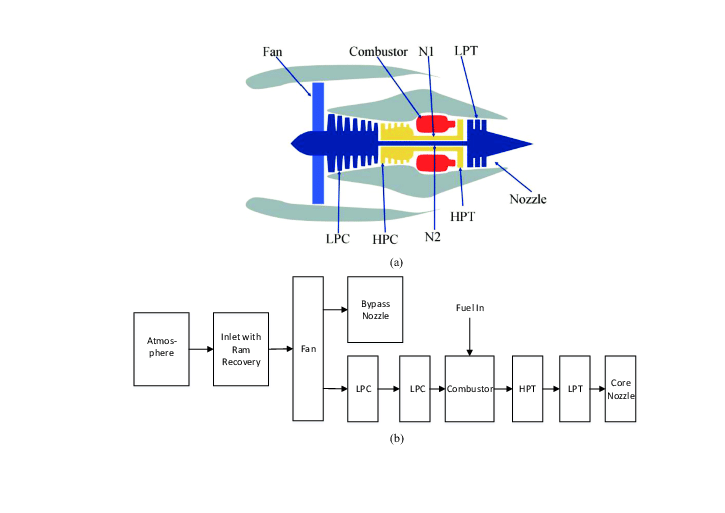

## Aircraft Engine Systems in General

Fan module

Low Pressure Compressor Module

High Pressure Compressor Module

High Pressure Turbine Module

Low Pressure Turbine Module

Exhaust Nozzle

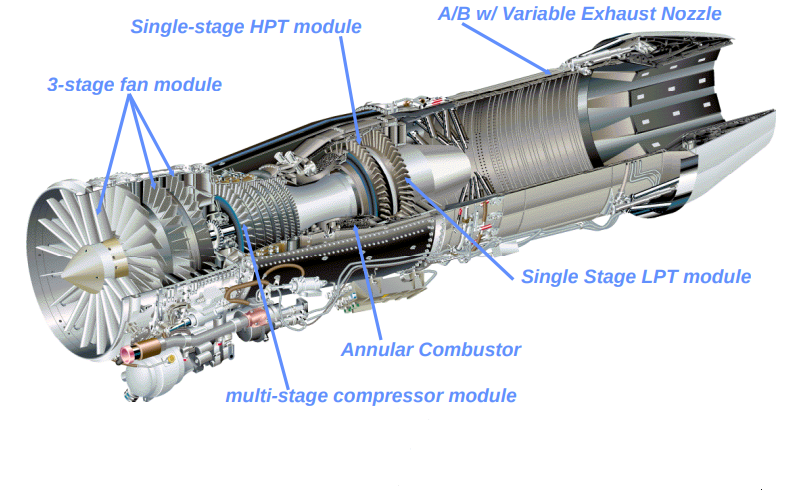



A turbine engine consists of its main components, which change the state of the gas flow in the sequence of the thermodynamic working cycle. 

The core engine consists of the high pressure compressor module, the combustion section and the high pressure turbine module . This modular design of the engine mainly reflects maintenance aspects. 
During engine disassembly each module can be removed from the engine without disassembling it into its piece parts.

For the assembly process of the engine the modules are pre-assembled and then assembled to the complete engine. Each module has its specific maintenance schedules and as well as skill and tool requirements.
Besides reflecting maintenance aspects this modular concept is likewise useful to describe elementary functions of engine operation and incidences of the working cycle. 

### Business Understanding

Besides serving their allocated functions the engine systems must be designed to satisfy further objectives of the operator of the aircraft. These objectives are to provide safety and reliability, must be economically viable and competitive and meet certification requirements. These certification requirements include those for noise and pollution.
Providing safety and reliability requires introducing failure management into the design of a system i.e. avoiding failures and securing continuation of a flight even when a component has failed.

Maintenance of aircraft engines is expensive and time consuming; maintenance costs typically account for between ten and twenty per cent of aircraft-related operating costs. Hence,it is necessary to optimize maintenance,improving the competitive position.Thus, the business areas include maintenance of aircraft engines, both commercial and military.

When an engine is removed for maintenance, it needs to be replaced by a spare as the operator normally requires access to an operational aircraft during the maintenance period.The spare engine may be owned by the operator or the maintenance supplier, or it may be leased from a third party. The cost of the spare engine is always significant, regardless of how it is obtained. Every maintenance event is therefore associated with a more or less fixed cost in addition to variable costs such as material costs.

Efficient maintenance of an aircraft focuses on ensuring the realization of the inherent safety and reliability levels of the aircraft and restoring safety and reliability to their inherent levels when deterioration has occurred. Such maintenance plays a key role in airline operation because it is essential to the safety of passengers and the reliability of airline schedules. An unexpected failure that may lead to an aircraft crash must be avoided at all costs.

Aircraft maintenance involves actions intended to restore an item to an operational condition. These actions can be subdivided into inspection and determination of condition, overhaul, servicing, modification, and repair. The common goal of maintenance is to provide a fully serviceable aircraft when it is required by an airline at minimum cost. Effective and efficient maintenance is therefore a prerequisite for a successful aviation industry.

An aircraft engine is a complex and advanced system that has to meet high standards of safety and reliability. Regular maintenance with disassembling and replacement of parts is therefore required. Maintaining a fleet of aircraft also presents challenges from a business perspective since the goals of decreasing maintenance and operations costs may conflict with desired service levels and safety levels. Maintenance and how it is performed is therefore of the utmost importance. While an engine is being maintained, it is not available for operation. This can have serious consequences if the engine in question is needed for operation in, say, a combat situation.
It is therefore very important to determine exactly what maintenance is needed and to avoid excessive maintenance.

Maintaining an aircraft engine is not only complex and time consuming but also very expensive. It may account for approximately 30% of the total maintenance cost for an aircraft. It is therefore of great importance to be time efficient and to decrease costs without jeopardizing safety. It is also very important to avoid performing excessive work and/or component replacement, which would both reduce engine availability and lead to the discarding of components with life remaining.


####  Flight Data

Columns 

dataset : Master data set for the case study 

esn: Engine serial unique number given for a specific engine  

unit: Engine unit number assigned to a given ESN

flight cycle : Several flight cycles are recorded for given ESN

datetime : Date and time when the engine measurements were taken

operator: unique code for a specific airline

depart_icao: code for the departure airport

destination_icao: code for the destination airport

hpc_eff_mod:High Pressure Compressor (HPC) efficiency modifier

hpc_flow_mod: High Pressure Compressor (HPC) flow modifier

tra: Throttle Resolver Angle 

t2: Total temperatura at fan inlet

t24: Total temperature at Low Presssure Compressor (LPC) outlet

t30: Total temperature at High Pressure Compressor (HPC) outlet

t50:Total temperature at Low Pressure Turbine (LPT) outlet

p2: Pressure at fan inlet

p15: Total pressure at High Pressure Compressor (HPC) outlet

p30: Total pressure at High Pressure Compressor (HPC) outlet

nf: Physical fan speed

nc: Physical core speed

epr: Engine pressure ratio(p30/p2)

ps30: Static pressure at HPC outlet

phi: Ratio of fuel flow to ps30

nrf:Corrected fan speed 

nrc: Corrected core speed

bpr: Bypass Ratio

farb:Burner fuel-air ratio

htbleed: Bleed Enthalpy

nf_dmd: Demand fan speed 

pcnfr_dmd: Demand corrected fan speed

w31: HPT coolant bleed

w32: LPT coolant bleed

In [102]:
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.io as pio
import ipywidgets as widgets
import plotly.graph_objects as go
from openpyxl import load_workbook
from scipy.stats import weibull_min
from __future__ import print_function
from plotly.subplots import make_subplots
from numpy.core.fromnumeric import repeat, shape
from datetime import datetime, date, time
from mpl_toolkits.basemap import Basemap
from reliability.Fitters import Fit_Weibull_2P
from reliability.Probability_plotting import plot_points
from reliability.Distributions import Gamma_Distribution
from ipywidgets import interact, interactive,interactive, fixed, interact_manual

In [103]:
pio.renderers.default = "notebook"

In [104]:
# Load in the workbook
wb = load_workbook('../data/GE_Dataset_ Task1.xlsx')
print(wb.sheetnames)

['Title Sheet', 'Sheet1', 'av_engine_data_axm_psql', 'av_engine_data_fron_psql', 'av_engine_data_aic_psql', 'av_engine_data_pgt_psql', 'av_lkp_airport_codes_t_psql', 'av_bom_manufacturing_psql', 'av_manufacturing_supply_chain', 'av_esn_rul_psql']


In [105]:
# Get currently active sheet
ws = wb.active
print(ws)

<Worksheet "Title Sheet">


In [106]:
df01_flight_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_engine_data_axm_psql",engine="openpyxl",parse_dates=True)
df01_flight_data.head()

dataset     esn  unit  flight_cycle  ... nf_dmd pcnfr_dmd   w31     w32
0  test_FD001  999126    26             1  ...   2388       100 38.82 23.3876
1  test_FD001  999126    26             2  ...   2388       100    39 23.3793
2  test_FD001  999126    26             3  ...   2388       100  39.2  23.339
3  test_FD001  999126    26             4  ...   2388       100 38.97 23.3931
4  test_FD001  999126    26             5  ...   2388       100 39.11 23.3904

[5 rows x 32 columns]

In [107]:
df01_flight_data.shape

(21188, 32)

##### Data Cleaning

In [108]:
df01_flight_data.isna().sum()

dataset               0
esn                   0
unit                  0
flight_cycle          0
datetime              0
operator              0
depart_icao         780
destination_icao    990
hpc_eff_mod           0
hpc_flow_mod          0
tra                   0
t2                    0
t24                   0
t30                   0
t50                   0
p2                    0
p15                   0
p30                   0
nf                    0
nc                    0
epr                   0
ps30                  0
phi                   0
nrf                   0
nrc                   0
bpr                   0
farb                  0
htbleed               0
nf_dmd                0
pcnfr_dmd             0
w31                   0
w32                   0
dtype: int64

In [109]:
df01_flight_data.duplicated().any()

True

Removing Duplicate Values

In [110]:
df01_flight_data_drop_duplicated = df01_flight_data.drop_duplicates()

In [111]:
df01_flight_data_drop_duplicated.shape

(10594, 32)

Removing Observations with Missing Values

In [112]:
df01_flight_data_clean = df01_flight_data_drop_duplicated.dropna(how='any')

In [113]:
df01_flight_data_clean['dataset'].unique()

array(['test_FD001', 'train_FD001'], dtype=object)

In [114]:
df01_flight_data_clean['esn'].unique()

array([999126, 999114, 999149, 999062, 999026, 999140, 999029, 999110,
       999055, 999127, 999049, 999118, 999011, 999147, 999034, 999132,
       999060, 999152, 999054, 999123, 999146, 999019, 999108, 999010,
       999033, 999111, 999044, 999160, 999009, 999131, 999008, 999145,
       999002, 999136, 999037, 999107, 999057, 999106, 999045, 999164,
       999064, 999176, 999170, 999165, 999091, 999083, 999100, 999090,
       999196, 999181, 999072, 999174, 999076, 999099, 999093, 999098,
       999094, 999173, 999097, 999187, 999188, 999085, 999180, 999190,
       999096, 999191, 999179, 999193, 999074, 999172])

In [115]:
df01_flight_data_clean['dataset'].value_counts()

train_FD001    5215
test_FD001     4848
Name: dataset, dtype: int64

In [116]:
df01_flight_data_clean.loc[:,['hpc_eff_mod','hpc_flow_mod','t24','t30','p2','p15','p30','nf','nc','t50','nrf','nrc','w31']].describe().T

count         mean         std     min     25%     50%     75%     max
hpc_eff_mod   10063 -3.12134e-05  0.00219105 -0.0087 -0.0015       0  0.0014  0.0087
hpc_flow_mod  10063  6.35993e-06  0.00029282 -0.0006 -0.0002       0  0.0003  0.0007
t24           10063      642.617    0.480838  641.13  642.27  642.58  642.92  644.39
t30           10063      1589.83     5.89813 1570.12 1585.69 1589.57 1593.46 1616.91
p2            10063        14.62 3.55289e-15   14.62   14.62   14.62   14.62   14.62
p15           10063      21.6098  0.00149769    21.6   21.61   21.61   21.61   21.61
p30           10063      553.482     0.84719  550.35  552.95  553.57   554.1  555.81
nf            10063      2388.09   0.0697635 2387.89 2388.04 2388.09 2388.13  2388.5
nc            10063      9062.09     18.0524 9024.27  9052.1  9059.4  9066.9 9239.76
t50           10063      1406.43     6.69639 1385.21 1401.46 1406.88 1411.37 1424.48
nrf           10063      2388.09   0.0693908 2387.88 2388.04 2388.09 2388.13 2388.56
nrc           10063      8141.35     15.6703 8099.94 8132.82 8139.53  8146.4 8289.63
w31           10063      38.8384    0.171982   38.14   38.73   38.85   38.96   39.43

In [117]:
df01_flight_data_clean.loc[50:55,['esn','flight_cycle','datetime','w31','t50']].sort_values(by=['flight_cycle','datetime'])

esn  flight_cycle            datetime   w31     t50
54  999149             1 2018-01-01 17:24:16 38.95 1405.05
55  999149             2 2018-01-01 20:42:20 39.08 1391.77
50  999114            24 2018-01-07 02:22:01 38.71 1404.42
51  999114            25 2018-01-07 19:17:00 38.85 1403.99
53  999114            27 2018-01-07 22:37:00 38.65  1410.3

In [118]:
df01_flight_data_clean.groupby(["dataset","esn"])["flight_cycle"].max().reset_index()   

dataset     esn  flight_cycle
0    test_FD001  999106           105
1    test_FD001  999107           160
2    test_FD001  999108           166
3    test_FD001  999110           192
4    test_FD001  999111            83
5    test_FD001  999114            46
6    test_FD001  999118           133
7    test_FD001  999123           130
8    test_FD001  999126            76
9    test_FD001  999127           140
10   test_FD001  999131           196
11   test_FD001  999132           145
12   test_FD001  999136           125
13   test_FD001  999140           133
14   test_FD001  999145           152
15   test_FD001  999146           146
16   test_FD001  999147            71
17   test_FD001  999149           303
18   test_FD001  999152           189
19   test_FD001  999160           147
20   test_FD001  999164           168
21   test_FD001  999165            71
22   test_FD001  999170           152
23   test_FD001  999172           131
24   test_FD001  999173           112
25   test_FD001  999174           137
26   test_FD001  999176           204
27   test_FD001  999179           101
28   test_FD001  999180           133
29   test_FD001  999181           213
30   test_FD001  999187            56
31   test_FD001  999188            68
32   test_FD001  999190           146
33   test_FD001  999191           234
34   test_FD001  999193           244
35   test_FD001  999196            97
36  train_FD001  999002           269
37  train_FD001  999008           125
38  train_FD001  999009           189
39  train_FD001  999010           203
40  train_FD001  999011           236
41  train_FD001  999019           100
42  train_FD001  999026           121
43  train_FD001  999029           142
44  train_FD001  999033           147
45  train_FD001  999034           150
46  train_FD001  999037           133
47  train_FD001  999044           158
48  train_FD001  999045            89
49  train_FD001  999049           137
50  train_FD001  999054           253
51  train_FD001  999055           165
52  train_FD001  999057            70
53  train_FD001  999060           161
54  train_FD001  999062           152
55  train_FD001  999064           228
56  train_FD001  999072           170
57  train_FD001  999074           130
58  train_FD001  999076           202
59  train_FD001  999083           251
60  train_FD001  999085           119
61  train_FD001  999090            83
62  train_FD001  999091           102
63  train_FD001  999093           117
64  train_FD001  999094           224
65  train_FD001  999096           268
66  train_FD001  999097           198
67  train_FD001  999098            95
68  train_FD001  999099           124
69  train_FD001  999100           173

In [119]:
df_aircraft_engine01 = df01_flight_data_clean[df01_flight_data_clean["esn"]==999149]

In [120]:
df_aircraft_engine01.tail()

dataset     esn  unit  flight_cycle  ... nf_dmd pcnfr_dmd   w31     w32
9476  test_FD001  999149    49           299  ...   2388       100  38.8 23.2172
9477  test_FD001  999149    49           300  ...   2388       100 38.58 23.1759
9478  test_FD001  999149    49           301  ...   2388       100 38.59 23.0071
9479  test_FD001  999149    49           302  ...   2388       100 38.68 23.0789
9510  test_FD001  999149    49           303  ...   2388       100 38.56 23.1167

[5 rows x 32 columns]

The Mean time between failure (MTBF) for stated period in the life of an item, the mean value of the length of time between consecutive failures computed as ratio of the cumulative observed time to the failures under stated conditions.

MTBF is estimated by dividing total operating time on all units by number of failures observed. MTBF is used with repairable systems.

In [121]:
from reliability.Reliability_testing import reliability_test_planner
reliability_test_planner(test_duration=21,CI=0.8,number_of_failures=1, one_sided=False)



Reliability Test Planner results for time-terminated test:
Solving for MTBF
Test duration: 21
MTBF (lower confidence bound): 5.39884595367068
Number of failures: 1
Confidence interval (2 sided): 0.8


The log of the instantaneous failure rate and its reciprocal, the instantaneous MTBF, are both linear functions of the log of cumulative test time.

Plotting the data on logarithmic is the first step in reliability growth analysis. Some authors skip the plot of cumulative failures versus cumulative time and go directly to plots of failure rate or MTBF.

Duane reliability growth model parameters:
Alpha: 0.42531
A: 0.57338
Demonstrated MTBF (cumulative): 26.86511
Demonstrated MTBF (instantaneous): 46.74719
Demonstrated failure intensity (cumulative): 0.037223
Demonstrated failure intensity (instantaneous): 0.021392
Time to reach target MTBF: 14.25844



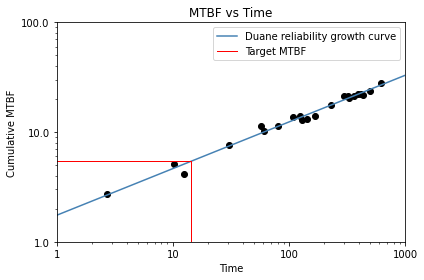

In [122]:
from reliability.Repairable_systems import reliability_growth
from reliability.Datasets import system_growth
reliability_growth(times=system_growth().failures, model="Duane", target_MTBF=5.4, log_scale=True)
plt.tight_layout()
plt.show()

### The extreme value distributions

The reliability engineering is concerned with the behaviour in the extreme tails of distribution.

In reliability work we are often concerned not with the distribution of variables which describe the bulk of the sample but only with extreme values which can lead to failure.

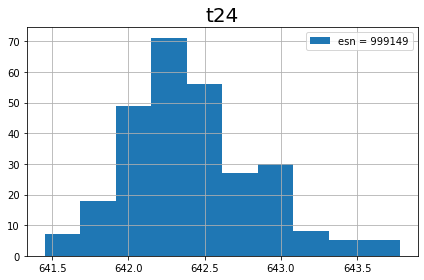

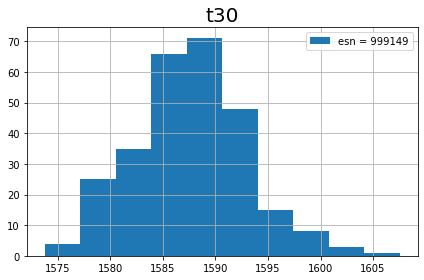

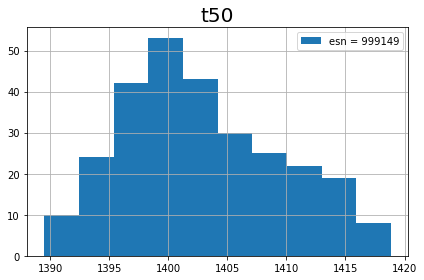

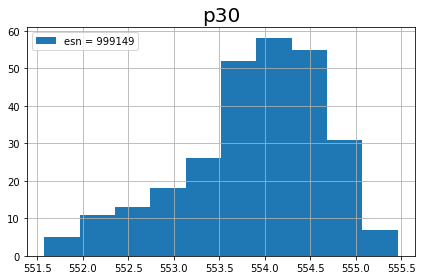

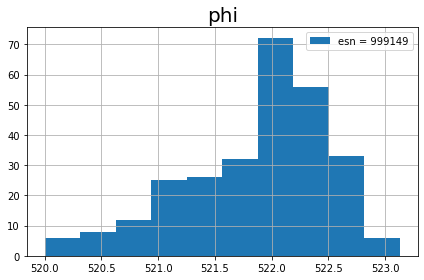

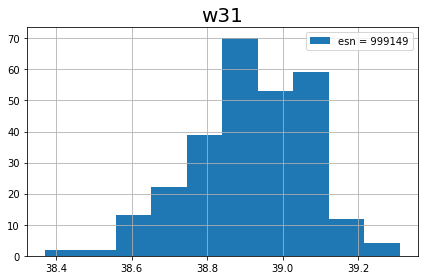

In [123]:
df_aircraft_engine01_continuos_variables = df_aircraft_engine01[['t24','t30','t50','p30','phi','w31']]
for col in df_aircraft_engine01_continuos_variables.columns:
    plt.hist(df_aircraft_engine01[col])
    plt.grid(True, axis="both")
    plt.title(col, size=20)
    plt.legend(['esn = 999149'])
    plt.tight_layout()
    plt.show()

#### The gamma distribution
The gamma distribution describes, in reliability terms, the situation when partial failures exist, when a given number of partial failure events must occur before an item fails.

The gamma dsitribution can also be used to describe a decreasing or increasing hazard rate. When alpha < 1 , hazard rate decreasing whilst for alpha > 1, hard rate increasing.

##### Reliability and hazard funtions

Reliable engineering is concerned with the probability that an item will survive for stated interval, for example time,cycles.

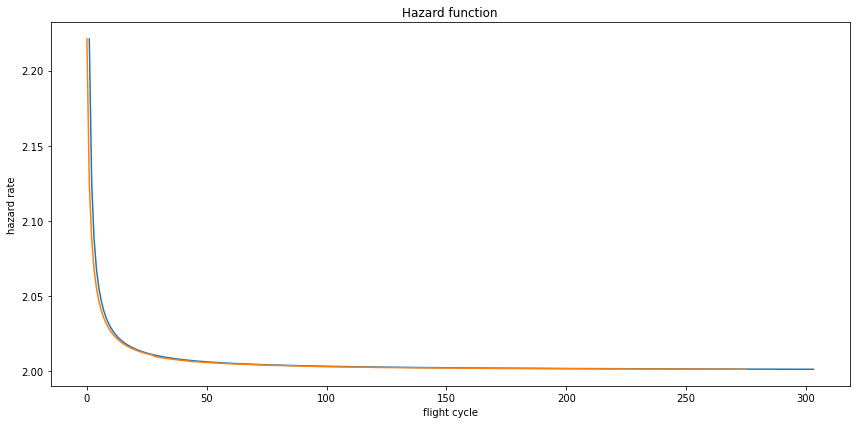

In [124]:
plt.rcParams["figure.figsize"]=(12,6)
flight_cycle = df_aircraft_engine01['flight_cycle'].values.tolist()
dist = Gamma_Distribution(alpha=0.5,beta=0.7).HF(xvals=flight_cycle)
plt.plot(dist)
plt.title('Hazard function')
plt.xlabel('flight cycle')
plt.ylabel('hazard rate')
plt.tight_layout()
plt.show()

### Reliability of Mechanical Components and System 

Typical failure modes with old age, rapid wear out include:
  
  stress corrosion,

  material properties,
  
  some forms of erosion.

All wear out modes have increasing failure rates with age and therefore, decreasing reliability. Overhauls and inspections may be cost effective to replace parts that produce significant failures. Airlines remove compressor and turbine disks at their B.01 life to reduce the risk of non-contained turbine failures in flight. 

#### Materials for Aircraft Engines

Titanium is extensively used in the aerospace industry and increasingly used in general engineering applications, especially where high strength/weight ratio and corrosion resistance are major considerations. Ti-6A1-4V alloy has an excellent combination of strength, toughness and good corrosion resistance. 


Titanium and its alloys have very attractive properties, which enable them to be used in the fields of aerospace, biomedical, automotive, marine and military. The demand for the use of titanium and its alloys in many areas of applications has increased over the past years by the necessity for weight reductions that enhance the efficiency and greatly reduce the fuel consumption when used in the transportation systems, aerospace and automotive applications. 



The choice for many fields of applications:

Aircraft turbines

Engine components

Aircraft structural components

Aerospace fasteners

High-performance automatic parts

Marine applications

Fan Blade

Titanium, aluminum and stainless steel have been used in the fan blades, and titanium is often used because of its high strength to weight ratio, corrosion resistance, and creep resistance. For the GEnx engines, the fan blades are composed of Carbon Fiber Reinforced Plastic composite (CFRP) blades and titanium leading edge (Ti-6Al-4V alloys).


TiAl and Ti Al 3 phases in Ti-6Al-4V alloys constitute a lamellar structure. In terms of mechanical properties, a lamellar structure shows more resistance against creep and fatigue crack growth and higher toughness. Especially, Ti-6Al-4V alloys show high-temperature strength below approximately 800 graus Celsius.

Compressor Section

The Compressor section is responsible for compressing air which is taken into the engine by the fan. Due to compressing air, the temperature in the section begin to rise; therefore, materials having high-temperature strength are used such as Fe-, Ni-, and Ti-based alloys. For the GEnx engines, they have high compression ratios by using two compressor sections, a seven stage lowpressure compressor and a ten stage high-pressure compressor. Also, the low-pressure compressor spins counter-clock wise, and the high-pressure compressor spins clockwise, which realizes improvement of fuel efficiency.

The low-pressure compressor blades and several high-pressure compressor blades are made of Ti-6Al-4V alloys which are also used for the fan blade, and the rest of high-pressure compressor blades are made of Ni-based superalloys such as Hastelloy X. In recent years, Ti-based alloys have become to be used for the high-pressure compressor section in order to reduce weight, and for thesame purpose Ti-based alloys such as Ti-6242 (Ti-6Al-2Sn-4Zr-2Mo) is used in the middle section exposed to high temperature.


Combustor Section

The Combustor section, after the compressor section, is responsible for mixing the compressed air with fuel and igniting the mixture of air and fuel. This provides a high temperature and high energy airflow generating the power to propel an aircraft. The temperature in combustor can reach to approximately 1000 graus Celsius, so this section needs to be made of heat-resistant alloys such as Coand Ni-based superalloys. To improve mechanical properties of the superalloys, several additives will be selected such as Aluminum (Al) and Titanium (Ti) for strength, Chromium (Cr) for corrosion resistance, and Molybdenum (Mo), Tungsten (W) and Rhenium (Re) for increasing high-temperature strength.


Turbine Blade

The Turbine section is responsible for generating the power to rotate other parts; the fan, compressor and combustor. The rotation of the turbine blades is generated by the combustion air and is transmitted to the rotation of the shaft which goes through four sections introduced so far and therefore rotates in a wide operating temperature range. In the engine, the turbine section is exposed to the harshest environment in terms of temperature and pressure. Therefore, the materials of turbine section need to satisfy many requirements such as high creep strength, high temperature fatigue strength, and high temperature corrosion resistance. 

The turbine materials in high pressure and temperature section are generally Ni-based superalloys because of their high creep strength, while the materials in low pressure and temperature section can be stainless steels, Co-, and Ni-based superalloys. Since the turbine blade temperature exceed 1200 graus Celsius and can reach to 1500 graus Celsius in the latest engines, cooling passages design, zirconia (ZrO2) for thermal barrier coating, and Ni-Co-Cr-Al-Y alloys for high temperature corrosion resistance can be used in order to improve turbine blade performance.

##### Mechanical components can fail if they  break as result of applied mechanical stresses

In [125]:
from reliability.PoF import fracture_mechanics_crack_initiation
mechanical__fracture = fracture_mechanics_crack_initiation(P=10, A=20000, Kt=2.53, q=0.8, Sy=758, E=114000, K=1170, n=0.15, b=0.28, c=0.3, sigma_f=1160, epsilon_f=0.84,mean_stress_correction_method='SWT')

Results from fracture_mechanics_crack_initiation:
A crack of 1 mm will be formed after: 50.0 cycles (100.0 reversals).
Stresses in the component: Min = -606.7464 MPa , Max = 606.7464 MPa , Mean = 1.4779288903810084e-12 MPa.
Strains in the component: Min = -0.0179 , Max = 0.0179 , Mean = -4.163336342344337e-17
Mean stress correction method used: SWT


In [126]:
df_aircraft_engine01["depart_icao"].unique()

array(['WMKK', 'WBKW', 'WIII', 'WBKL', 'WBGS', 'WBKK', 'WMKP', 'WMKC',
       'WBGB', 'VHHH', 'VTSG', 'VTBD', 'VVTS', 'VLLB', 'WBGR', 'WBGG',
       'VVNB', 'VTSP', 'VTCC', 'VDPP', 'WBKS', 'WMKJ', 'WIMM', 'WADL',
       'WIEE'], dtype=object)

In [127]:
df_aircraft_engine01.groupby('depart_icao')['t30'].describe()

count    mean     std     min     25%     50%     75%     max
depart_icao                                                               
VDPP             2 1587.51 2.26274 1585.91 1586.71 1587.51 1588.31 1589.11
VHHH             2 1585.38 1.19501 1584.53 1584.95 1585.38  1585.8 1586.22
VLLB            16 1587.61 5.47404 1577.73 1584.55  1587.7 1591.78 1596.53
VTBD            11 1587.27 4.85442 1579.31 1583.89 1588.38 1589.32 1597.93
VTCC             6 1587.66 5.63647 1578.82 1584.29 1589.86 1591.39  1593.1
VTSG             2 1587.12 4.90025 1583.65 1585.38 1587.12 1588.85 1590.58
VTSP             2 1591.74 3.06177 1589.57 1590.65 1591.74 1592.82  1593.9
VVNB             3  1587.9 6.66996 1580.36 1585.34 1590.31 1591.67 1593.03
VVTS             7 1585.56 2.90045 1580.73 1584.01 1586.62 1587.28 1589.01
WADL             1 1596.58     NaN 1596.58 1596.58 1596.58 1596.58 1596.58
WBGB             2 1580.34 5.10531 1576.73 1578.54 1580.34 1582.14 1583.95
WBGG             2 1584.93 1.26572 1584.04 1584.49 1584.93 1585.38 1585.83
WBGR            12 1588.34  5.2171  1580.4 1585.11 1588.26 1591.45 1596.49
WBGS             2 1582.76 4.29214 1579.73 1581.25 1582.76 1584.28  1585.8
WBKK             9 1588.26 6.52392 1578.28 1585.99 1588.46 1589.26 1602.95
WBKL             1 1573.73     NaN 1573.73 1573.73 1573.73 1573.73 1573.73
WBKS             1 1587.23     NaN 1587.23 1587.23 1587.23 1587.23 1587.23
WBKW             5 1587.36 3.48557 1582.62 1585.55  1587.6 1589.35  1591.7
WIEE             1 1607.55     NaN 1607.55 1607.55 1607.55 1607.55 1607.55
WIII             8 1588.89 5.62215 1581.89 1584.97 1587.57 1592.91 1597.93
WIMM             1 1593.08     NaN 1593.08 1593.08 1593.08 1593.08 1593.08
WMKC             2 1579.97 6.39932 1575.44  1577.7 1579.97 1582.23 1584.49
WMKJ             1 1587.75     NaN 1587.75 1587.75 1587.75 1587.75 1587.75
WMKK           171 1587.83 5.20818 1577.03 1584.44  1587.6 1591.58 1603.71
WMKP             6 1584.35 6.47935  1578.5 1579.06 1582.49 1588.61  1594.1

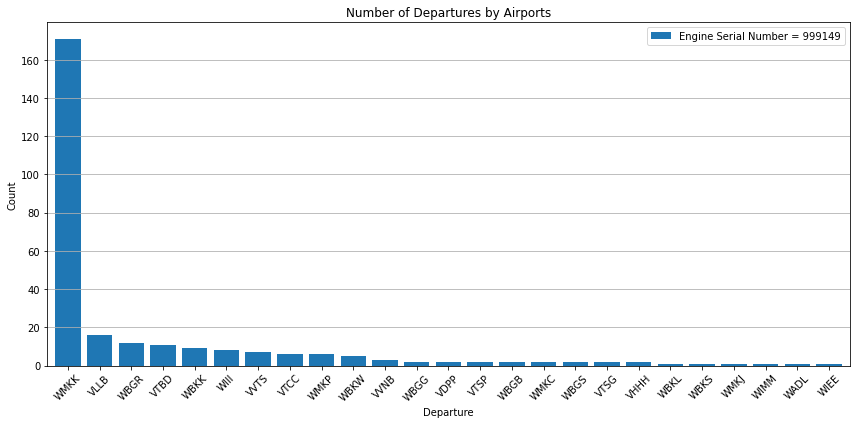

In [128]:
departure_airport_counts = df_aircraft_engine01["depart_icao"].value_counts()
plt.rcParams["figure.figsize"]=(12,6)
departure_airport_counts.plot(kind="bar", width=0.8)
plt.grid(True, axis="y")
plt.xticks(rotation=45)
plt.title("Number of Departures by Airports")
plt.xlabel("Departure")
plt.ylabel("Count")
plt.legend(['Engine Serial Number = 999149'])
plt.tight_layout()
plt.show()

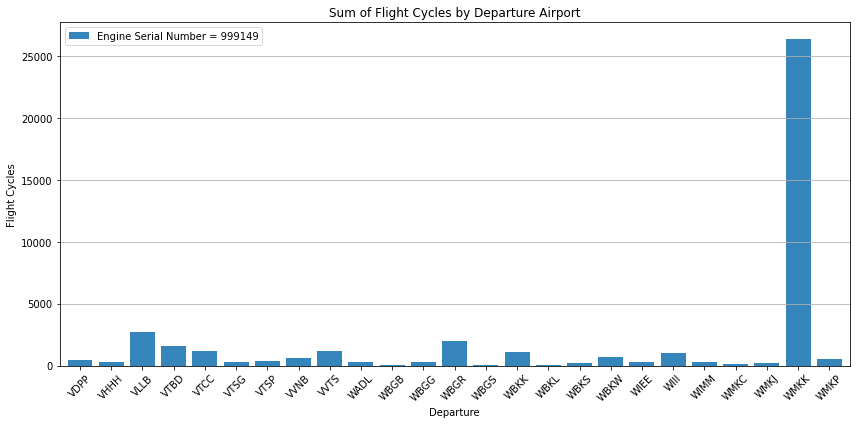

In [129]:
flight_cycle_sum = df_aircraft_engine01.groupby("depart_icao")['flight_cycle'].sum()
flight_cycle_sum.plot(kind="bar", width=0.8, alpha=0.9)
plt.grid(True, axis="y")
plt.xticks(rotation=45)
plt.title("Sum of Flight Cycles by Departure Airport")
plt.xlabel("Departure")
plt.ylabel("Flight Cycles")
plt.legend(['Engine Serial Number = 999149'])
plt.tight_layout()
plt.show()

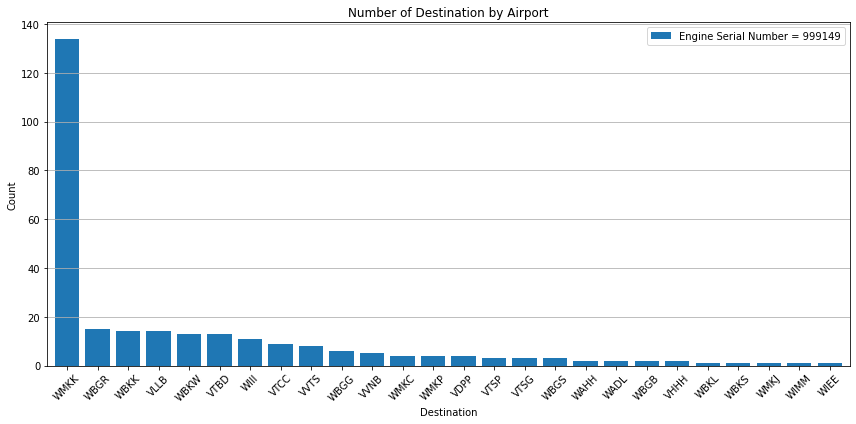

In [130]:
destination_counts = df_aircraft_engine01["destination_icao"].value_counts()
destination_counts.plot(kind="bar", width=0.8)
plt.grid(True, axis="y")
plt.xticks(rotation=45)
plt.title("Number of Destination by Airport")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.legend(['Engine Serial Number = 999149'])
plt.tight_layout()
plt.show()

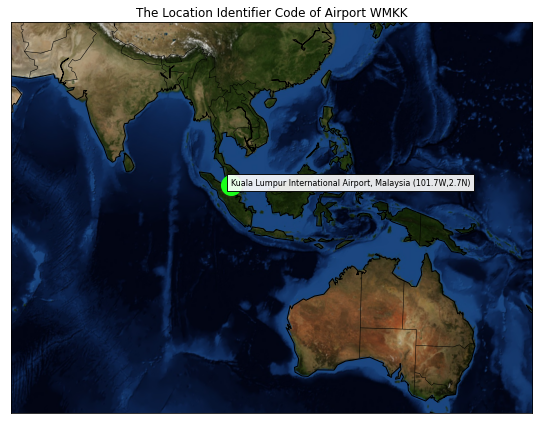

In [131]:
m = Basemap(width=12000000,height=9000000,projection='lcc',resolution='c',lat_0=-4,lon_0=110)
m.bluemarble(scale=0.5)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
longitude1,latitude1 = m(101.698, 2.743)
lonpt, latpt = m(longitude1,latitude1,inverse=True)
m.plot(longitude1,latitude1,'o', color='#1aff1a', markersize=20)
plt.title("The Location Identifier Code of Airport WMKK")
plt.text(longitude1,latitude1,'Kuala Lumpur International Airport, Malaysia (%5.1fW,%3.1fN)' % (lonpt,latpt),bbox=dict(facecolor='white', alpha=0.9), size=8)
plt.tight_layout()
plt.show()

In [132]:
hpc_outlet_aircraft_engine01 = df_aircraft_engine01.loc[(df_aircraft_engine01["depart_icao"] =='WMKK') | (df_aircraft_engine01["depart_icao"] =='WBKK')]
hpc_outlet_aircraft_engine01.head()

dataset     esn  unit  flight_cycle  ... nf_dmd pcnfr_dmd   w31     w32
54  test_FD001  999149    49             1  ...   2388       100 38.95  23.361
56  test_FD001  999149    49             3  ...   2388       100  39.1 23.4173
58  test_FD001  999149    49             5  ...   2388       100 39.04 23.3513
90  test_FD001  999149    49             7  ...   2388       100 39.11 23.4216
92  test_FD001  999149    49             9  ...   2388       100  38.9 23.4746

[5 rows x 32 columns]

In [133]:
#Identifying suspected outliers
figure01 = px.box(hpc_outlet_aircraft_engine01, x="depart_icao", y="t30", 
                  title="Total Temperature at High Pressure Compressor Outlet by Departure Airport")
figure01.show()

In [134]:
figure02 = px.scatter(hpc_outlet_aircraft_engine01, x="phi", y="w31",
                      hover_name ="depart_icao",
                      trendline="lowess",
                      trendline_scope = "overall",
                      trendline_options=dict(frac=1),
                      trendline_color_override="#00b33c",
                      title="High Pressure Turbine Coolant Bleed as a Function of Ratio Fuel Flow for the ps30")
figure02.show()

In [135]:
figure03 = px.scatter(hpc_outlet_aircraft_engine01, x="t30", y="p30",
                       hover_name ="depart_icao",
                       trendline="lowess",
                       trendline_scope = "overall",
                       trendline_options=dict(frac=1),
                       trendline_color_override="#ff3333",
                       title="Total Pressure HPC Outlet and Total Temperature HPC Outlet")
figure03.show()

In [136]:
df_aircraft_engine01['hpc_flow_mod'].min()

-0.0005

In [137]:
df_aircraft_engine01['hpc_flow_mod'].max()

0.0005

In [138]:
df02_flight_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_engine_data_fron_psql", engine="openpyxl",parse_dates=True)
df02_flight_data.head()

dataset     esn  unit  flight_cycle  ... nf_dmd pcnfr_dmd   w31     w32
0  train_FD001  999050    50             1  ...   2388       100  38.8 23.3016
1  train_FD001  999050    50             2  ...   2388       100 38.99  23.344
2  train_FD001  999050    50             3  ...   2388       100 38.91  23.319
3  train_FD001  999050    50             4  ...   2388       100 38.95 23.3161
4  train_FD001  999050    50             5  ...   2388       100 38.83 23.3256

[5 rows x 32 columns]

In [139]:
df02_flight_data["dataset"].unique()

array(['train_FD001', 'test_FD001'], dtype=object)

In [140]:
df02_flight_data["esn"].unique()

array([999050, 999021, 999015, 999129, 999105, 999046, 999119, 999025,
       999113, 999053, 999124, 999047, 999141, 999003, 999158, 999061,
       999142, 999052, 999156, 999023, 999014, 999159, 999017, 999121,
       999115, 999028, 999109, 999036, 999135, 999007, 999184, 999171,
       999195, 999192, 999167, 999087, 999078, 999089, 999068, 999067,
       999189, 999086, 999073, 999075, 999081, 999066])

In [141]:
df02_flight_data.isna().sum()

dataset              0
esn                  0
unit                 0
flight_cycle         0
datetime             0
operator             0
depart_icao         30
destination_icao    63
hpc_eff_mod          0
hpc_flow_mod         0
tra                  0
t2                   0
t24                  0
t30                  0
t50                  0
p2                   0
p15                  0
p30                  0
nf                   0
nc                   0
epr                  0
ps30                 0
phi                  0
nrf                  0
nrc                  0
bpr                  0
farb                 0
htbleed              0
nf_dmd               0
pcnfr_dmd            0
w31                  0
w32                  0
dtype: int64

In [142]:
df02_flight_data.duplicated().any()

False

In [143]:
df02_flight_data.shape

(7290, 32)

In [144]:
df02_flight_data_clean = df02_flight_data.dropna(how='any')

In [145]:
df02_flight_data_clean.loc[:,['hpc_eff_mod','hpc_flow_mod','t24','t30','p2','p15','p30','t50','w31']].describe()

hpc_eff_mod  hpc_flow_mod      t24     t30          p2        p15      p30     t50      w31
count         7224          7224     7224    7224        7224       7224     7224    7224     7224
mean   2.61628e-05  -3.87597e-06  642.653 1590.13       14.62    21.6098  553.417 1406.93  38.8284
std     0.00222137   0.000295373 0.485856  5.9181 5.32944e-15 0.00146274 0.856019 6.65027 0.175418
min        -0.0084       -0.0006   641.39 1573.06       14.62       21.6   550.48 1384.39    38.19
25%        -0.0014       -0.0003   642.31 1586.04       14.62      21.61   552.88  1401.8    38.72
50%              0             0   642.61 1589.66       14.62      21.61    553.5 1407.39   38.845
75%         0.0015        0.0002   642.95 1593.96       14.62      21.61   554.04 1411.87    38.95
max         0.0083        0.0006   644.44 1614.72       14.62      21.61   555.54 1424.26    39.41

In [146]:
df02_flight_data_clean['datetime'].min()

Timestamp('2017-12-31 18:22:57')

In [147]:
df02_flight_data_clean['datetime'].max()

Timestamp('2018-07-16 01:52:04')

In [148]:
df02_flight_data_clean.groupby(['dataset','esn']).agg({"flight_cycle":['sum','max']}).reset_index()

dataset     esn flight_cycle     
                                 sum  max
0    test_FD001  999105         4812   98
1    test_FD001  999109         1524   55
2    test_FD001  999113        19033  195
3    test_FD001  999115         2926   76
4    test_FD001  999119         9027  135
5    test_FD001  999121        10826  148
6    test_FD001  999124        16380  186
7    test_FD001  999129        14433  171
8    test_FD001  999135        19701  198
9    test_FD001  999141         7563  123
10   test_FD001  999142        12246  156
11   test_FD001  999156         9316  136
12   test_FD001  999158        15576  176
13   test_FD001  999159         4465   94
14   test_FD001  999167         2556   71
15   test_FD001  999171         2346   68
16   test_FD001  999184        14763  172
17   test_FD001  999189        14790  176
18   test_FD001  999192        10993  150
19   test_FD001  999195         4005   89
20  train_FD001  999003        10360  144
21  train_FD001  999007        25878  227
22  train_FD001  999014         8128  127
23  train_FD001  999015        14535  170
24  train_FD001  999017        25122  226
25  train_FD001  999021        13861  166
26  train_FD001  999023         8646  131
27  train_FD001  999025        11128  150
28  train_FD001  999028         8999  134
29  train_FD001  999036         5676  107
30  train_FD001  999046        22756  215
31  train_FD001  999047        17020  184
32  train_FD001  999050        13203  162
33  train_FD001  999052        15400  175
34  train_FD001  999053        14947  174
35  train_FD001  999061        10153  142
36  train_FD001  999066        11628  152
37  train_FD001  999067        40755  286
38  train_FD001  999068        16836  183
39  train_FD001  999073        16058  179
40  train_FD001  999075        22698  213
41  train_FD001  999078        15382  175
42  train_FD001  999081        14800  173
43  train_FD001  999086        37791  275
44  train_FD001  999087        13573  165
45  train_FD001  999089        16405  181

In [149]:
df_aircraft_engine02 = df02_flight_data_clean[df02_flight_data_clean.esn==999067]

In [150]:
hpc_outlet_aircraft_engine02 = df_aircraft_engine02.loc[(df_aircraft_engine02["depart_icao"] =='KLAS') | (df_aircraft_engine02["depart_icao"]=='KMCO')]
hpc_outlet_aircraft_engine02.head()

dataset     esn  unit  flight_cycle  ... nf_dmd pcnfr_dmd   w31     w32
4660  train_FD001  999067    67             7  ...   2388       100    39 23.3112
4663  train_FD001  999067    67            10  ...   2388       100 38.81 23.2336
4665  train_FD001  999067    67            12  ...   2388       100 38.98 23.3586
4667  train_FD001  999067    67            14  ...   2388       100 38.89 23.3984
4669  train_FD001  999067    67            16  ...   2388       100 39.08 23.3985

[5 rows x 32 columns]

In [151]:
figure04 = px.box(hpc_outlet_aircraft_engine02, x="depart_icao", y="t30", 
                  title="Total Temperature at High Pressure Compressor Outlet by Departure Airport")
figure04.show()

In [152]:
df_aircraft_engine02_sort = df_aircraft_engine02.sort_values(by="flight_cycle")
figure05 = px.line(df_aircraft_engine02_sort, 
                    x="flight_cycle", 
                    y="nf",
                    hover_name='esn',
                    line_shape='spline',
                    markers=True,
                    color_discrete_sequence=["#538cc6"],
                    title="Line Graph of Physical Fan Speed per Flight Cycles ")
figure05.show()

In [153]:
figure06 = px.line(df_aircraft_engine02_sort, 
                   x="flight_cycle", 
                   y="nc",
                   hover_name='esn',
                   line_shape='spline',
                   markers=True,
                   title="Line Graph of Physical Core Speed per Flight Cycles")
figure06.show()

In [154]:
figure07 = px.line(df_aircraft_engine02_sort,
                    x="flight_cycle", 
                    y="nrf", 
                    hover_name='esn',
                    line_shape='spline',
                    markers=True,
                    color_discrete_sequence=["#4080bf"],
                    title="Line Graph of Corrected Fan Speed per Flight Cycles")
figure07.show()

In [155]:
figure08 = px.line(df_aircraft_engine02_sort, 
                   x="flight_cycle", 
                   y="nrc", 
                   hover_name='esn',
                   line_shape='spline',
                   markers=True,
                   color_discrete_sequence=["#6699cc"],
                   title="Line Graph of Corrected Core Speed per Flight Cycles")
figure08.show()

In [156]:
df_aircraft_engine03 = df02_flight_data_clean[df02_flight_data_clean.esn==999068]

In [157]:
df_aircraft_engine03['hpc_eff_mod'].max()

0.0051

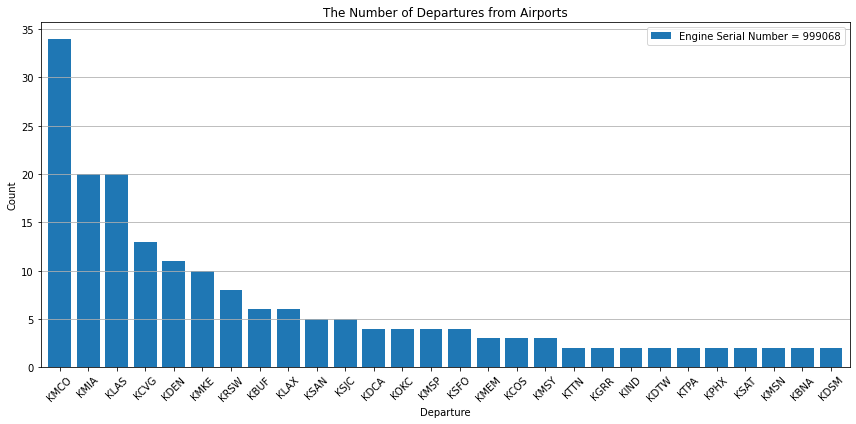

In [158]:
departure_airport_counts03 = df_aircraft_engine03["depart_icao"].value_counts()
departure_airport_counts03.plot(kind="bar", width=0.8)
plt.grid(True, axis="y")
plt.xticks(rotation=45)
plt.title("The Number of Departures from Airports")
plt.xlabel("Departure")
plt.ylabel("Count")
plt.legend(['Engine Serial Number = 999068'])
plt.tight_layout()
plt.show()

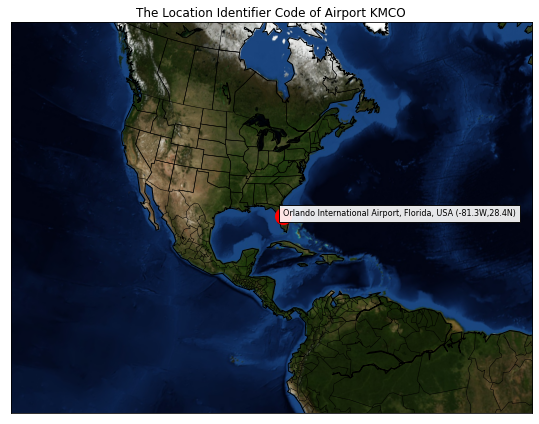

In [159]:
m = Basemap(width=12000000,height=9000000,projection='lcc',resolution='c', lat_0=28,lon_0=-84.)
m.bluemarble(scale=0.5)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
longitude2,latitude2 = m(-81.309, 28.429)
lonpt2, latpt2 = m(longitude2,latitude2,inverse=True)
m.plot(longitude2,latitude2,'o', color='#ff0000', markersize=16)
plt.title("The Location Identifier Code of Airport KMCO")
plt.text(longitude2,latitude2,'Orlando International Airport, Florida, USA (%5.1fW,%3.1fN)' % (lonpt2,latpt2),bbox=dict(facecolor='white', alpha=0.9), size=8)
plt.tight_layout()
plt.show()

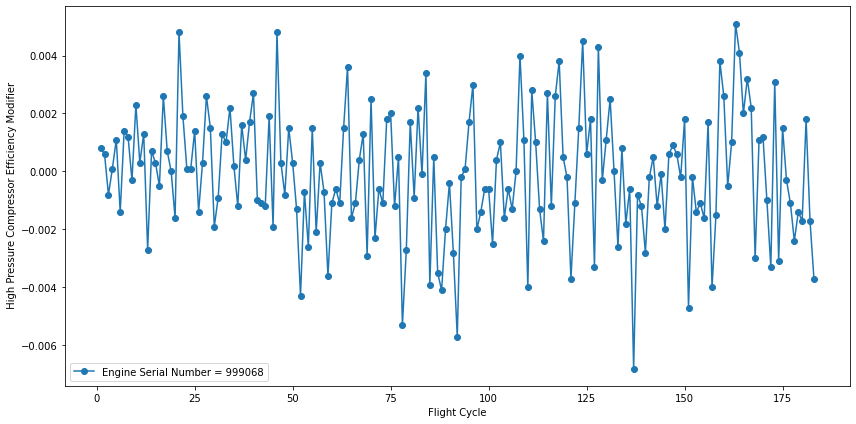

In [160]:
plt.rcParams["figure.figsize"]=(12,6)
plt.plot(df_aircraft_engine03.flight_cycle, df_aircraft_engine03.hpc_eff_mod, marker="o")
plt.xlabel("Flight Cycle")
plt.ylabel(" High Pressure Compressor Efficiency Modifier")
plt.legend(['Engine Serial Number = 999068'], loc='lower left')
plt.tight_layout()
plt.show()

In [161]:
figure09 = px.scatter(df_aircraft_engine03, x="flight_cycle", y="hpc_flow_mod",
                       hover_name ="depart_icao",
                       trendline="ewm",
                       trendline_scope = "overall",
                       trendline_options=dict(halflife=0.1),
                       color_discrete_sequence=["#6699cc"],
                       title="High Pressure Compressor Flow Modifier per Flight Cycle")
figure09.show()

In [162]:
df_flight_data_merge01 = pd.merge(left=df01_flight_data_clean, right=df02_flight_data_clean, how='right')

In [163]:
df_flight_data_merge01.head()

dataset     esn  unit  flight_cycle  ... nf_dmd pcnfr_dmd   w31     w32
0  train_FD001  999050    50             1  ...   2388       100  38.8 23.3016
1  train_FD001  999050    50             2  ...   2388       100 38.99  23.344
2  train_FD001  999050    50             3  ...   2388       100 38.91  23.319
3  train_FD001  999050    50             4  ...   2388       100 38.95 23.3161
4  train_FD001  999050    50             5  ...   2388       100 38.83 23.3256

[5 rows x 32 columns]

In [164]:
df_flight_data_merge01['esn'].unique()

array([999050, 999021, 999015, 999129, 999105, 999046, 999119, 999025,
       999113, 999053, 999124, 999047, 999141, 999003, 999158, 999061,
       999142, 999052, 999156, 999023, 999014, 999159, 999017, 999121,
       999115, 999028, 999109, 999036, 999135, 999007, 999184, 999171,
       999195, 999192, 999167, 999087, 999078, 999089, 999068, 999067,
       999189, 999086, 999073, 999075, 999081, 999066])

In [165]:
df03_flight_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_engine_data_aic_psql", engine="openpyxl",parse_dates=True)
df03_flight_data.tail()

dataset     esn  unit  flight_cycle  ... nf_dmd pcnfr_dmd   w31     w32
5815  train_FD001  999069    69           330  ...   2388       100 38.53 23.0549
5816  train_FD001  999069    69           331  ...   2388       100 38.28  23.061
5817  train_FD001  999069    69           332  ...   2388       100 38.47 23.0422
5818  train_FD001  999069    69           333  ...   2388       100 38.52 23.1208
5819  train_FD001  999069    69           334  ...   2388       100 38.42 22.9782

[5 rows x 32 columns]

In [166]:
df03_flight_data["esn"].unique()

array([999001, 999012, 999120, 999134, 999006, 999154, 999035, 999157,
       999063, 999148, 999004, 999104, 999039, 999139, 999059, 999138,
       999018, 999161, 999038, 999117, 999043, 999031, 999102, 999137,
       999016, 999116, 999042, 999130, 999144, 999128, 999166, 999175,
       999177, 999088, 999092, 999070, 999077, 999082, 999198, 999069])

In [167]:
df03_flight_data_clean = df03_flight_data.dropna(how='any')

In [168]:
df03_flight_data_clean.loc[:,['hpc_eff_mod','hpc_flow_mod','t24','t30','p2','p15','p30','t50','w31']].describe()

hpc_eff_mod  hpc_flow_mod      t24     t30          p2        p15      p30     t50      w31
count         5761          5761     5761    5761        5761       5761     5761    5761     5761
mean   2.97865e-05   1.68721e-05  182.967 1589.94       14.62    21.6098  553.458 1406.72  38.8337
std     0.00219799   0.000294127 0.472635 5.87685 1.77651e-15 0.00126701 0.841241 6.44487 0.171268
min        -0.0086       -0.0006   181.48 1569.04       14.62       21.6   549.85 1387.15    38.22
25%        -0.0014       -0.0002   182.64 1585.84       14.62      21.61   552.96 1402.14    38.73
50%              0             0   182.93 1589.47       14.62      21.61   553.56 1406.91    38.85
75%         0.0015        0.0003   183.26 1593.52       14.62      21.61   554.03 1411.41    38.96
max         0.0076        0.0006   184.86 1612.11       14.62      21.61   555.84 1423.76    39.41

In [169]:
df_aircraft_engine04 = df03_flight_data_clean[df03_flight_data_clean["esn"]==999134]

In [170]:
df_aircraft_engine04['datetime'].min()

Timestamp('2017-12-31 19:45:42')

In [171]:
df_aircraft_engine04['datetime'].max()

Timestamp('2018-02-04 22:50:00')

##### The turbine parts may fail as a function of time at high temperature 
High-temperature fatigue combined with time-dependent temperature variations applies to specific structures. 
As an example, turbine blades are exposed to high combustion temperatures, high centrifugal forces and vibratory bending loads. 

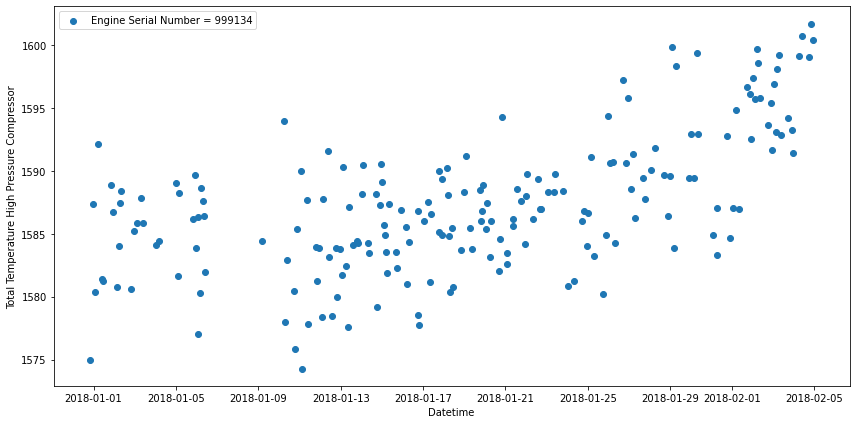

In [172]:
plt.scatter(df_aircraft_engine04.datetime, df_aircraft_engine04.t30)
plt.xlabel("Datetime")
plt.ylabel("Total Temperature High Pressure Compressor")
plt.legend(['Engine Serial Number = 999134'])
plt.tight_layout()
plt.show()

In [173]:
figure10 = px.scatter(df_aircraft_engine04, x="w31", y="t30",
                       hover_name ="esn",
                       trendline="lowess",
                       trendline_scope = "overall",
                       trendline_options=dict(frac=0.1),
                       trendline_color_override="#ffa64d",
                       title="Temperature High Pressure Compressor as Funtions of HPT Coolant Bleed")
figure10.show()

In [174]:
df_flight_data_merge02 = pd.merge(left=df_flight_data_merge01,right=df03_flight_data_clean,how='right')

In [175]:
df_flight_data_merge02.tail()

dataset     esn  unit  flight_cycle  ... nf_dmd pcnfr_dmd   w31     w32
5756  train_FD001  999069    69           330  ...   2388       100 38.53 23.0549
5757  train_FD001  999069    69           331  ...   2388       100 38.28  23.061
5758  train_FD001  999069    69           332  ...   2388       100 38.47 23.0422
5759  train_FD001  999069    69           333  ...   2388       100 38.52 23.1208
5760  train_FD001  999069    69           334  ...   2388       100 38.42 22.9782

[5 rows x 32 columns]

In [176]:
df04_flight_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_engine_data_pgt_psql", engine="openpyxl",parse_dates=True)
df04_flight_data.sample(n=5)

dataset     esn  unit  flight_cycle  ... nf_dmd pcnfr_dmd   w31     w32
840   train_FD001  999027    27            43  ...   2388       100 38.86 23.2555
5464  train_FD001  999079    79            76  ...   2388       100    39 23.3914
5063  train_FD001  999079    79            48  ...   2388       100 38.89 23.2638
3560  train_FD001  999056    56           152  ...   2388       100 38.64 23.2025
4890   test_FD001  999182    82           103  ...   2388       100 38.88 23.3234

[5 rows x 32 columns]

In [177]:
df04_flight_data_clean = df04_flight_data.dropna(how='any')

In [178]:
df_flight_data_merge03 = pd.merge(left=df_flight_data_merge02,right=df04_flight_data_clean,how='right')

In [179]:
df_flight_data_merge03['dataset'].value_counts()

train_FD001    3338
test_FD001     2601
Name: dataset, dtype: int64

Location Data 

Columns

airport_icao: Unique 4-letter identifier for a given airporticao(International Civil Aviation Organization)

latitude: The angular distance of a place north or south of the earth's equator, expressed in signed degrees format that are positive values are north of the equator)

longitude: The angular distance of a place east or west of the meridian at Greenwich, England that area positive values are east of the Prime Meridian

In [180]:
df05_location_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_lkp_airport_codes_t_psql", engine="openpyxl",parse_dates=True)
df05_location_data.sample(5)

airport_icao  destination_latitude  destination_longitude
12          KMIA                25.795                 -80.29
131         ENGM                60.203                 11.084
54          UWGG                 56.23                 43.784
105         VABP                23.287                 77.337
232         UGTB                41.669                 44.955

In [181]:
df05_location_data.shape

(319, 3)

In [182]:
df05_location_data[df05_location_data.airport_icao=='WMKK']

airport_icao  destination_latitude  destination_longitude
85         WMKK                 2.743                101.698

In [183]:
df05_location_data['destination_latitude'].min()

-8.758

In [184]:
df05_location_data['destination_latitude'].max()

60.203

In [185]:
df05_location_data['destination_longitude'].min()

-122.597

In [186]:
df05_location_data['destination_longitude'].max()

125.646

In [187]:
df05_location_data.dtypes

airport_icao              object
destination_latitude     float64
destination_longitude    float64
dtype: object

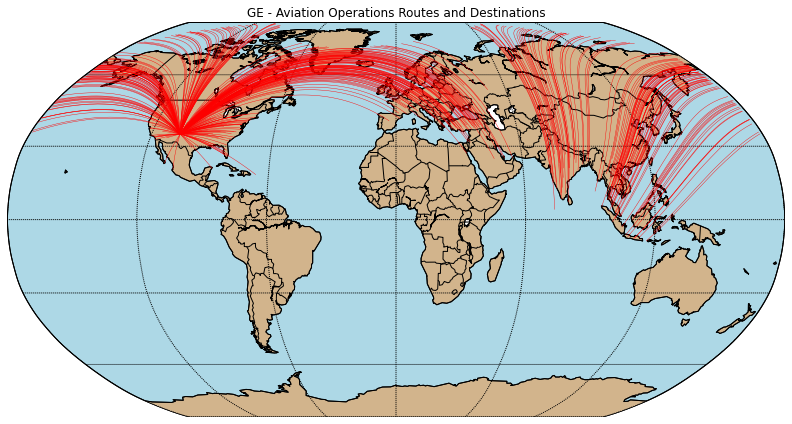

In [188]:
routes = []
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawcoastlines()
m.fillcontinents(color='tan')
m.drawcountries(linewidth=1) 
m.drawmapboundary(fill_color='#add8e6')

for name, row in df05_location_data.iloc[:300,[1,2]].iterrows():
    m.drawgreatcircle(
            row["destination_longitude"],
            row["destination_latitude"],
            lon2=-106,
            lat2=35,
            linewidth=0.4,
            color='#ff0000'
        )
plt.title("GE - Aviation Operations Routes and Destinations")
plt.tight_layout()
plt.show();

Manufacturing Data

Columns

esn: Engine Serial Number

pn: 3 parts represented in this dataset

sn: Unique serial number for a given part 

vsstream: Supply chain value stream for part, 3 represented in this dataset

In [189]:
df06_manufacturing_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_bom_manufacturing_psql", engine="openpyxl",parse_dates=True)
df06_manufacturing_data.sample(n=5)

esn        pn          sn    desc            vstream
9326   999016  44321P02  4526761418   blade  machined_airfoils
9497   999015  44321P02   774556950   blade  machined_airfoils
8954   999132  54321P01  7396252406  shroud                cmc
18507  999181  44321P02  6820430468   blade  machined_airfoils
8553   999013  54321P01  8739075467  shroud                cmc

In [190]:
df06_manufacturing_data.isna().sum()

esn        0
pn         0
sn         0
desc       0
vstream    0
dtype: int64

Remaining useful life

esn: Engine Serial Number 

rul: Remaining Useful Life

### What is remaining useful life?

Remaining useful life (RUL) is the length of time a machine is likely to operate before it requires repair or replacement.
By taking RUL into account, engineers can schedule maintenance, optimize operating efficiency, and avoid unplanned downtime.

For this reason, estimating RUL is a top priority in predictive maintenance programs.
The RUL assigned to the ESN is the number of operational cycles after the last cycle that engine will continue 
to operate.Remaining Useful Life is depicted as the number of cycles remaining until the engine needs to overhauled.

Engine Flight Cycle - A complete flight cycle includes the following events: engine start; a take-off and landing; and engine shutdown.

In [191]:
df07_av_esn_rul_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_esn_rul_psql", engine="openpyxl",parse_dates=True)
df07_av_esn_rul_data.sample(n=5)

esn  rul
78  999163   86
42  999145  110
82  999185  122
16  999192   20
70  999117   50

In [192]:
df07_av_esn_rul_data['rul'].min()

7

In [193]:
df07_av_esn_rul_data.shape

(100, 2)

In [194]:
df_flight_data_merge03.sample(5)

dataset     esn  unit  flight_cycle  ... nf_dmd pcnfr_dmd   w31     w32
4124   test_FD001  999194    94            83  ...   2388       100 38.82 23.2833
2544  train_FD001  999032    32            86  ...   2388       100 38.84 23.2273
4016  train_FD001  999005     5           185  ...   2388       100 38.89 23.2729
994    test_FD001  999112    12            36  ...   2388       100 39.19 23.3952
2914   test_FD001  999183    83            22  ...   2388       100 38.99 23.3593

[5 rows x 32 columns]

In [195]:
max_flight_cycle = df_flight_data_merge03.groupby('esn', as_index=False)[['flight_cycle']].max()
max_flight_cycle.head()



esn  flight_cycle
0  999005           251
1  999013           135
2  999020           214
3  999022           188
4  999024            82

In [196]:
df08_rul_data = pd.merge(max_flight_cycle,df07_av_esn_rul_data,on='esn')

In [197]:
df08_rul_data.head()

esn  flight_cycle  rul
0  999101            31  149
1  999103           126   66
2  999112           217  141
3  999122            39  122
4  999125            48  171

In [198]:
df08_rul_data.shape

(24, 3)

In [199]:
df08_rul_data.rename(columns={"flight_cycle":"max_flight_cycle"}, inplace=True)

In [200]:
df08_rul_data.head()

esn  max_flight_cycle  rul
0  999101                31  149
1  999103               126   66
2  999112               217  141
3  999122                39  122
4  999125                48  171

References

https://link.springer.com/chapter/10.1007%2F978-1-4020-6808-9_17

https://www.diva-portal.org/smash/get/diva2:945577/FULLTEXT01.pdf

https://www.colorado.edu/faculty/kantha/sites/default/files/attached-fil

https://www.theforage.com/modules/ThbphD5N5WRsd9Mxo/PDif4RapHRZLHb4gT?ref=WLAKhbpE2WPtZmHpo